In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sbr
import matplotlib.pyplot as mpl
import datetime as dt
import geopy.distance as distance


In [2]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install geopy 

Note: you may need to restart the kernel to use updated packages.


## Read CSV & preprocess it into subset Dataframe


In [5]:
df1=pd.read_excel(r"C:\Users\lenovo\Desktop\MSU_GRAD\Distributed Systems\DIST-sYS-PROJECT\datanew.xlsx",sheet_name="sheet1")
df1=df1.dropna()

#print(df2)

## Computing Time Taken(durations~Workload balance) and Location of base stations.

In [6]:
df2=df1[["start time","end time","location(latitude/lontitude)"]]
df2["Durations"]=(df1["end time"]-df1["start time"]).dt.total_seconds()
df2=df2.groupby(by="location(latitude/lontitude)").sum()
df2=df2.reset_index()
df2["Combined_longitude_latitude"]=[tuple(y for y in x.split("/")) for x in df2["location(latitude/lontitude)"]]
df2=df2[["Durations","Combined_longitude_latitude"]]
df2


<ipython-input-6-f47fe272dbe1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Durations"]=(df1["end time"]-df1["start time"]).dt.total_seconds()


,Durations,Combined_longitude_latitude
0,1507810.0,"(22.522803, 114.218796)"
1,643543.0,"(24.284812, 102.999068)"
2,50378.0,"(25.222206, 117.086322)"
3,3755547.0,"(26.139329, 103.078562)"
4,763464.0,"(26.215115, 109.744661)"
...,...,...
2764,15654.0,"(41.677262, 125.960124)"
2765,106027.0,"(41.835279, 123.498927)"
2766,92737.0,"(46.247857, 128.762232)"
2767,1808387.0,"(46.777465, 131.812182)"


## sample the data based on n


In [7]:
n=int(input("enter the total no of base_stations in the dataframe required for sampling "))
df3=df2.sample(n)
df3=df3.reset_index(drop=True)
df3


enter the total no of base_stations in the dataframe required for sampling 200


,Durations,Combined_longitude_latitude
0,624728.0,"(31.260165, 121.541462)"
1,3353.0,"(31.152571, 121.412981)"
2,396751.0,"(30.905367, 121.832974)"
3,1226653.0,"(31.273767, 121.222048)"
4,43973.0,"(31.266413, 121.351003)"
...,...,...
195,1411038.0,"(31.220809, 121.305363)"
196,218974.0,"(31.231585, 121.517218)"
197,10000.0,"(31.21176, 121.45331)"
198,15399.0,"(31.203742, 121.461251)"


## Random Approach

In [8]:
def random_approach(server_count,df3):
    df3=df3.reset_index(drop=True)
    #print(df3)
    #print(len(df3))
    closest_server_arr=[]
    for index_of_base_station in range(len(df3)):
        closest_server=0
        minimum_dist=np.inf
        for server in range(server_count):
            dist1=distance.distance(df3.iloc[index_of_base_station]["Combined_longitude_latitude"],df3.iloc[server]["Combined_longitude_latitude"]).km
            if(dist1<minimum_dist):
                minimum_dist=dist1
                closest_server=server
        closest_server_arr.append(closest_server)
    return (closest_server_arr)


def AccessDelay(closest_server_arr,df3):
    #print(len(closest_server_arr))
    # it must be equal to the length of dframe i.e each base station has chosen its nearest edgeserver.
    
    #but edge servers are placed near base station itself . so we are idirectly comparing DISTANCE between 2 B.STATION
    access_delay=0
    i=0
    for closest_server in closest_server_arr:
        access_delay+=distance.distance(df3.iloc[closest_server]["Combined_longitude_latitude"],df3.iloc[i]["Combined_longitude_latitude"]).km
        i+=1
    return access_delay
    


    """OR for each of the base syation from 1 to n, each has chosen its nearest edge server for which the distance is calculated and 
     added iteratively to finds the overall access delay for given set of edge server count"""

#      for i in range(len(df3)):
#             access_delay+=distance.distance(df3.iloc[closest_server[i]]["Combined_longitude_latitude"],df3.iloc[i]["Combined_longitude_latitude"]).km
#      return access_delay


def Workload_balance(closest_server_arr,df3):
    edge_servers=dict.fromkeys(closest_server_arr,0)
    """# edge_servers contains all the closest servers arranged in dictionary format where each of the edge server acts as key with value pair as "0" """
    """i.e an array of closest edge servers converted to dictionary"""
    for index,row in df3.iterrows():
        edge_servers[closest_server_arr[index]] +=  row["Durations"]
    total = 0
    mean = sum(edge_servers.values())/len(edge_servers)
    for key,value in edge_servers.items():
        total += (value - mean)**2
    return np.sqrt(total/len(edge_servers))
    

### Main function

In [11]:
def main():
    server_counts=[]
    ADSol_Arr,WBSol_Arr=[],[]
    server_count_set=int(input("enter the value of server count set."))
    # indicates the length of the server_count_set
    random_array=list(np.random.randint(4,n/2,server_count_set))
    print(random_array,"server_count_set")
    for server_count in random_array:
        print(server_count,"server count")
        closest_server_arr=random_approach(server_count,df3)
        
        ##perfrom calculation of access delay
        ADSol_Arr.append(AccessDelay(closest_server_arr,df3))
        
        # perfrom worklaod balance for given set of servers
        WBSol_Arr.append(Workload_balance(closest_server_arr,df3))
        
        server_counts.append(server_count)
    #mpl.figure()
    """Plotting of Access delay """
    mpl.scatter(server_counts,ADSol_Arr)
    mpl.xlabel("set of edge servers considered")
    mpl.ylabel("Access delay ")
    mpl.show()
    #print(ADSol_Arr)
    """Averaging access delay and minimum access delay of all the lot"""
    Average_access_delay=(sum(ADSol_Arr)/len(ADSol_Arr))
    print(f"Average access delay for given  set of server_count in a server set is {Average_access_delay}")
    print()
    
    Access_delay_dictionary=dict(zip(ADSol_Arr,server_counts))
    minimum_access_delay=min(Access_delay_dictionary.keys())
    print(f"Minimum access delay for given set of servers {Access_delay_dictionary[minimum_access_delay]} is {minimum_access_delay}")
    print()
    
    #print(server_counts)
    
    """plotting for Workload balance"""
    mpl.scatter(server_counts,WBSol_Arr)
    mpl.xlabel("set of edge servers considered")
    mpl.ylabel(" WLB")
    mpl.show()                                                                            
   # print(WBSol_Arr)
    
    """Averaging Workload balance and minimum access delay of all the lot"""
    
    Average_Workload_balance=(sum(WBSol_Arr)/len(WBSol_Arr))
    print(f"Average workload balance for given  set of server_count in a server set is {Average_Workload_balance}")
    print() 
    Workload_Balance_dictionary=dict(zip(WBSol_Arr,server_counts))
    minimum_Workload_Balance=min(Workload_Balance_dictionary.keys())
    print(f"Minimum Workload balance for given set of servers {Workload_Balance_dictionary[minimum_Workload_Balance]} is {minimum_Workload_Balance}")
    print()
   


enter the value of server count set.10
[21, 18, 63, 42, 97, 45, 70, 26, 68, 66] server_count_set
21 server count
18 server count
63 server count
42 server count
97 server count
45 server count
70 server count
26 server count
68 server count
66 server count


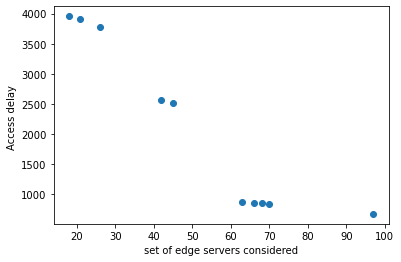

Average access delay for given  set of server_count in a server set is 2082.607142749656

Minimum access delay for given set of servers 97 is 671.4542946767586



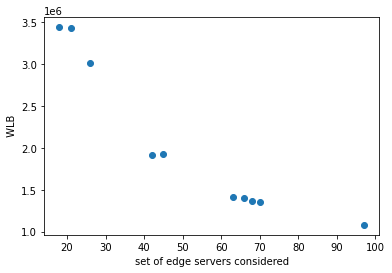

Average workload balance for given  set of server_count in a server set is 2034831.599378433

Minimum Workload balance for given set of servers 97 is 1080499.8642784897



In [12]:
main()